# STUDY CASE ABOUT DATA SALARY



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder

LOAD DATASET


In [2]:
DF = pd.read_csv('/content/drive/MyDrive/StudyCase_DA/Salary_Data.csv')
DF

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


###EXPLORATORY DATA ANALYST (EDA) OF DATASET

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


CHECK NULL VALUES

In [4]:
DF.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
DF.shape

(6704, 6)

In [6]:
#drop missing values

DF.dropna(inplace=True)

In [7]:
DF

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


CHECK DUPLICATE VALUES

In [8]:
DF.duplicated().sum()

4911

In [9]:
DF.drop_duplicates(inplace=True)
DF

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


RENAME KEYS FROM DATASET


In [10]:
DF.keys()

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [11]:
col = []
for key in DF.keys():
    key = key.strip().replace(' ', '_')
    col.append(key)

DF.columns = col
DF.keys()

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')

In [12]:
DF

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [13]:
DF.describe().astype(int)

,Age,Years_of_Experience,Salary
count,1787,1787,1787
mean,35,9,113184
std,8,6,51596
min,21,0,350
25%,29,3,70000
50%,33,8,110000
75%,41,13,160000
max,62,34,250000


In [14]:
DF.Job_Title.value_counts()

Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Financial Advisor              1
Junior Designer                1
Chief Technology Officer       1
Technical Recruiter            1
Delivery Driver                1
Name: Job_Title, Length: 191, dtype: int64

## ANALYSIS DATASET BY COLOUMNS

###Visualization by Age

In [17]:
DF['Age'].sort_values()

4884    21.0
5000    22.0
5137    22.0
2253    22.0
2673    22.0
        ... 
2396    60.0
1260    60.0
1211    61.0
1236    62.0
1225    62.0
Name: Age, Length: 1787, dtype: float64

In [18]:
def age_group_(x):
    if x >20 and x <=30:
        x= '21-30yo'
    elif x >30 and x <=40:
        x= '31-40yo'
    elif x >40 and x <=50:
        x= '41-50yo'
    elif x >50 and x <=60:
        x= '51-60yo'
    else:
        x= '61yo+'
    return x

In [19]:
DF['age_group'] = DF['Age'].apply(age_group_)
DF.groupby('age_group').size()

age_group
21-30yo    638
31-40yo    662
41-50yo    404
51-60yo     80
61yo+        3
dtype: int64

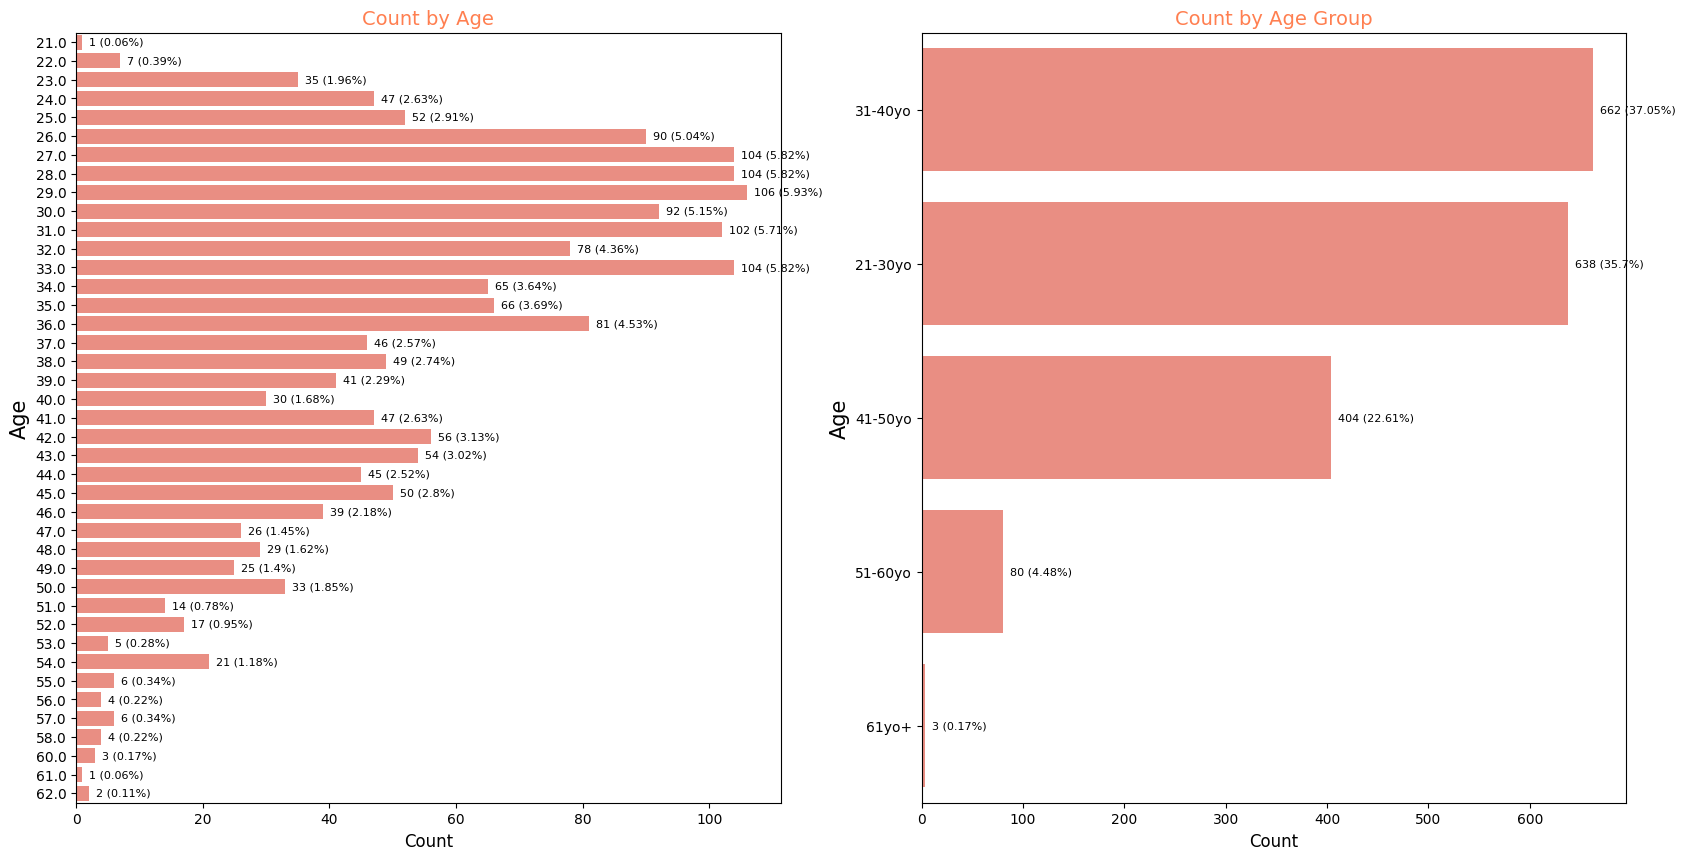

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(121)
bar1 = sns.countplot(y=DF['Age'], palette=['salmon'])
plt.title('Count by Age', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age', fontsize=15)

for n, patch in enumerate(bar1.patches):
    porc = f'{round((patch.get_width()/sum(DF["Age"].value_counts().values))*100, 2)}%'
    bar1.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)

plt.subplot(122)
bar2 = sns.countplot(y=DF['age_group'], palette=['salmon'])
plt.title('Count by Age Group', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age', fontsize=15)

for n, patch in enumerate(bar2.patches):
    porc = f'{round((patch.get_width()/sum(DF["age_group"].value_counts().values))*100, 2)}%'
    bar2.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)
       
plt.show()

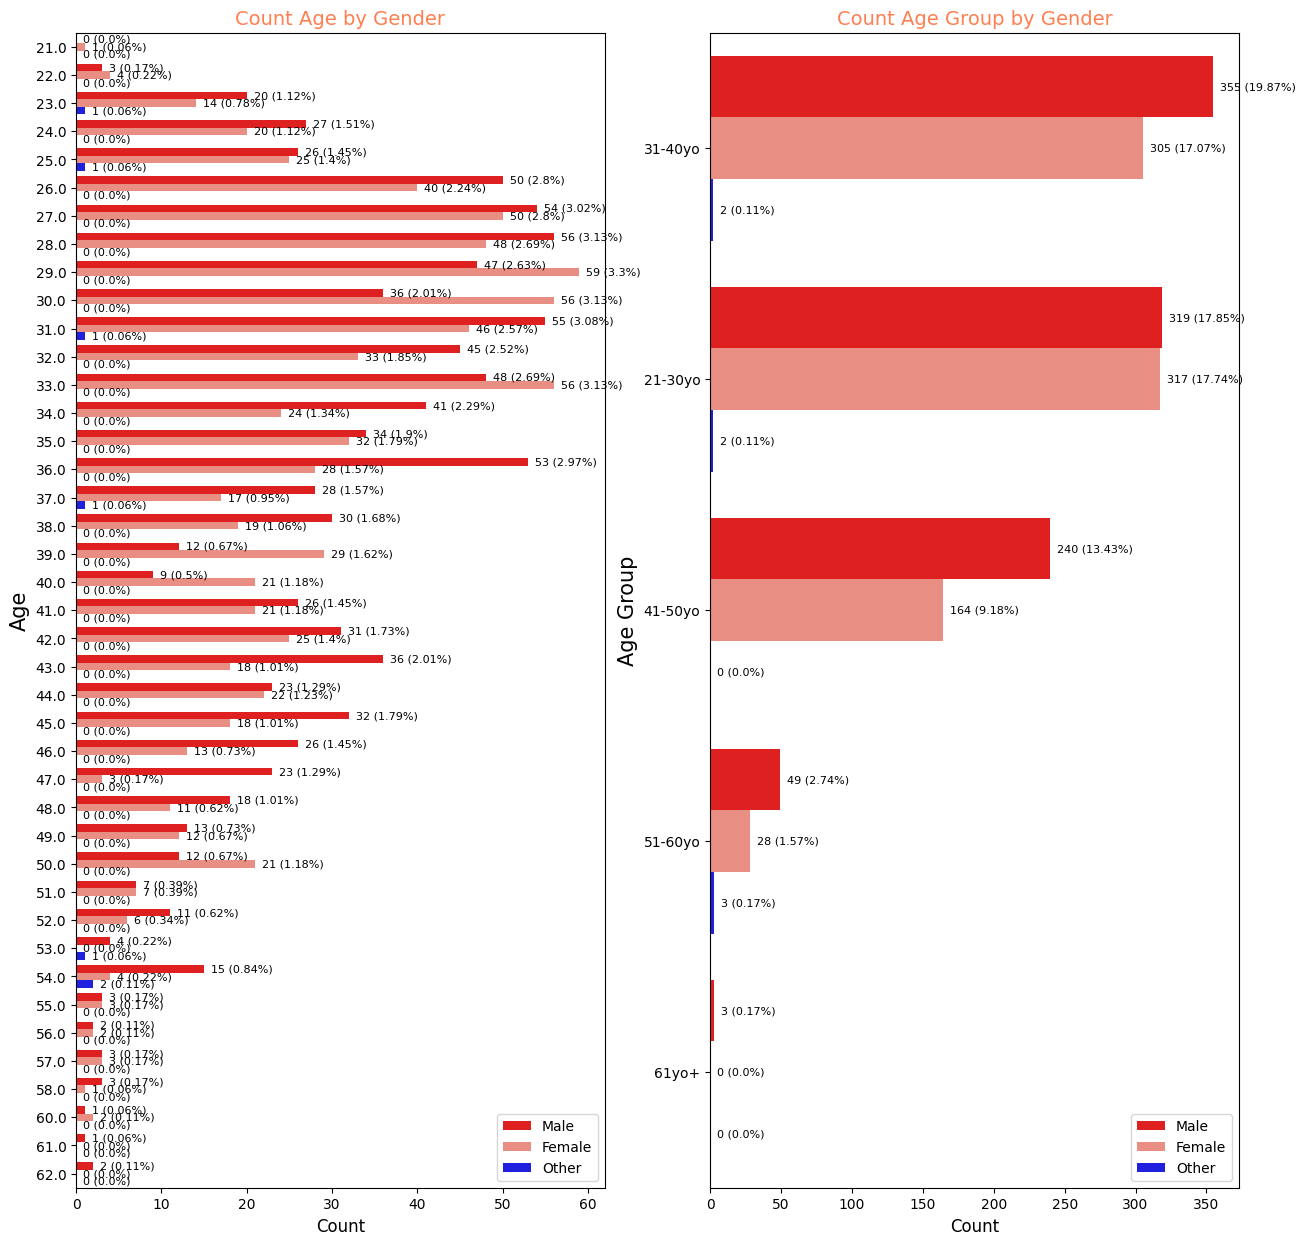

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(121)
bar3 = sns.countplot(y=DF['Age'], hue=DF['Gender'], palette=['red', 'salmon', 'blue'])
plt.title('Count Age by Gender', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age', fontsize=15)
plt.legend(loc='lower right')

for n, patch in enumerate(bar3.patches):
    porc = f'{round((patch.get_width()/sum(DF["Age"].value_counts().values))*100, 2)}%'
    bar3.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)

plt.subplot(122)
bar4 = sns.countplot(y=DF['age_group'], hue=DF['Gender'], palette=['red', 'salmon', 'blue'])
plt.title('Count Age Group by Gender', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age Group', fontsize=15)
plt.legend(loc='lower right')
for n, patch in enumerate(bar4.patches):
    porc = f'{round((patch.get_width()/sum(DF["Age"].value_counts().values))*100, 2)}%'
    bar4.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)
      
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

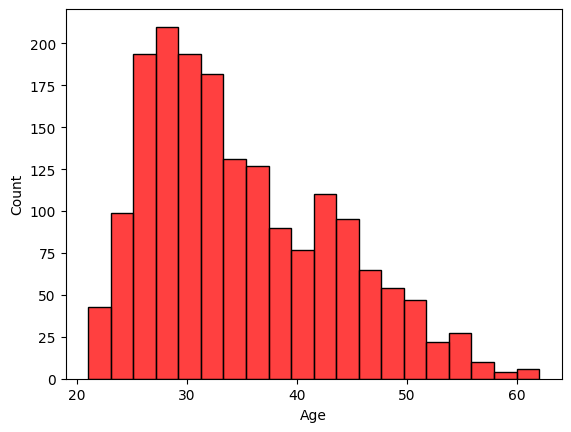

In [22]:
sns.histplot(x=DF['Age'], bins=20, color='red')

###Visualization by Gender


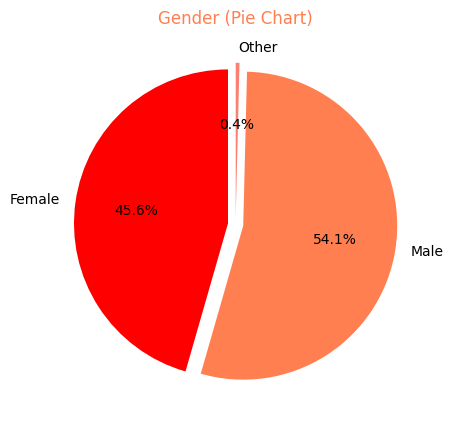

In [15]:
plt.figure(figsize=(15, 5))

DATA_Pie_Data = DF.groupby('Gender')
Pie_Label = sorted([i for i in DF.loc[:, 'Gender'].unique()])

explode = [0.05] * len(Pie_Label)

plt.pie(DATA_Pie_Data['Gender'].count(), labels=Pie_Label, explode=explode, startangle=90,
        autopct='%1.1f%%', radius=1, colors=['red', 'coral', 'salmon'])
plt.title('Gender (Pie Chart)', color='coral')

plt.show()

In [16]:
DF.Gender.value_counts()

Male      966
Female    814
Other       7
Name: Gender, dtype: int64

###Visualization by Education Level

In [23]:
DF['Education_Level'].value_counts()

Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: Education_Level, dtype: int64

From the Dataset, it can be seen that there are several data that have the similar meaning as
- Bachelor's and Bachelor's Degree are same
- Master's and Master's Degree are same
- PhD and phD are Same

In [24]:
DF['Education_Level'] = DF['Education_Level'].replace({"Bachelor's Degree": "Bachelor's", 
                                                       "Master's Degree": "Master's", "phD" : "PhD"})
DF['Education_Level'].value_counts()

Bachelor's     768
Master's       568
PhD            341
High School    110
Name: Education_Level, dtype: int64

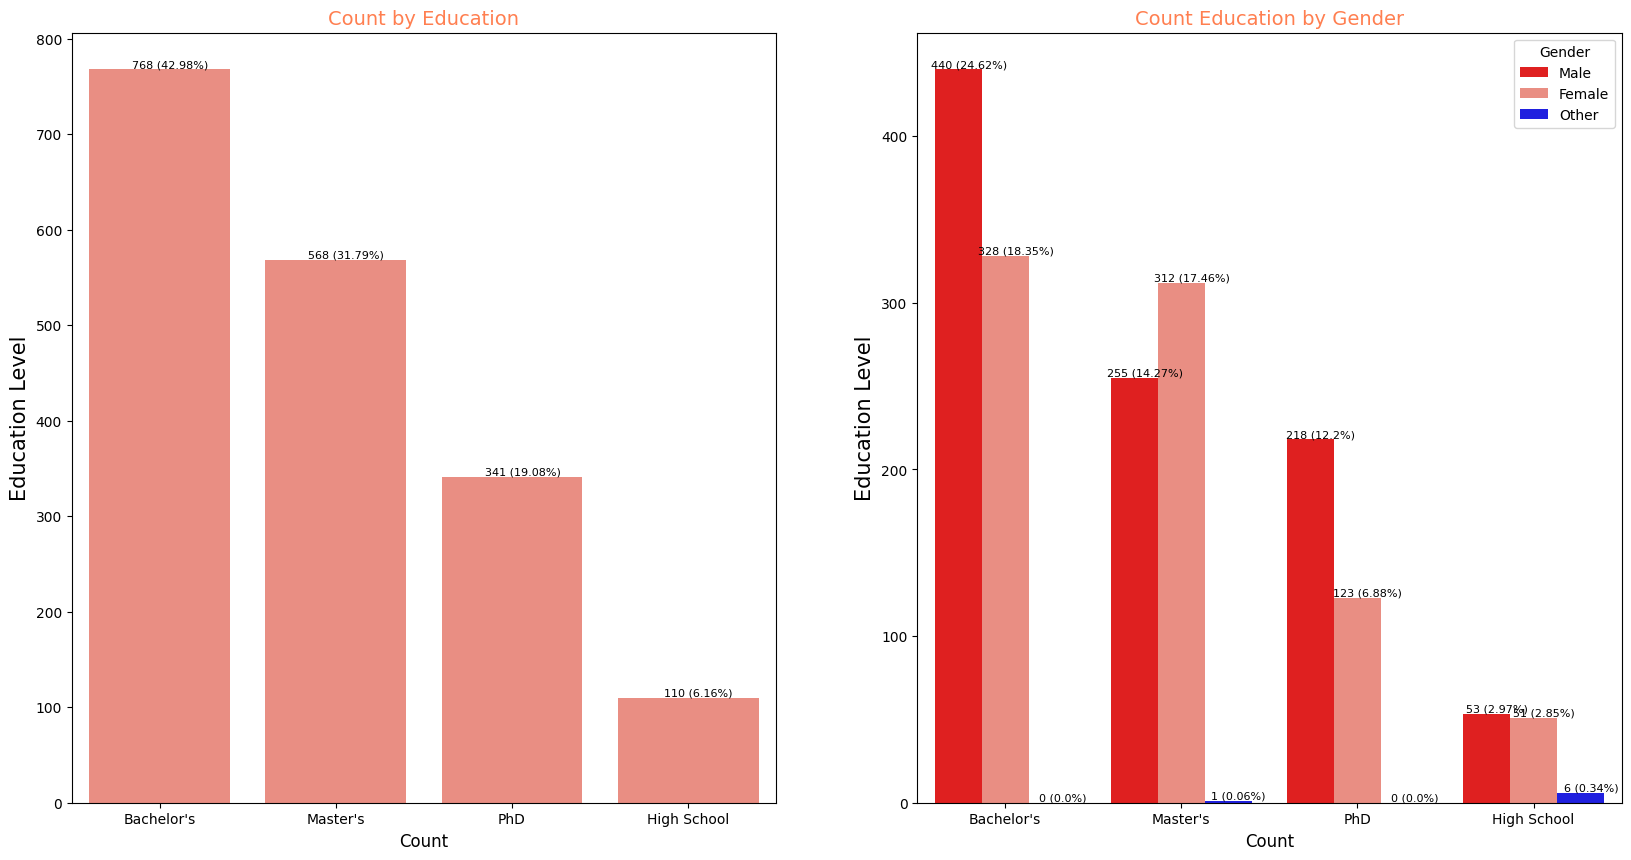

In [25]:
plt.figure(figsize=(20,10))

plt.subplot(121)
bar5 = sns.countplot(x=DF['Education_Level'], palette=['salmon'])
plt.title('Count by Education', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=15)

for patch in bar5.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    porc = f'{round((height / sum(DF["Education_Level"].value_counts().values)) * 100, 2)}%'
    bar5.annotate(f'  {int(height)} ({porc})',
                  xy=(x + width / 2, y + height),
                  xytext=(5, 0),
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=8)


plt.subplot(122)
bar6= sns.countplot(x=DF['Education_Level'], hue=DF['Gender'], palette=['red', 'salmon', 'blue'])
plt.title('Count Education by Gender', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=15)

for patch in bar6.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    porc = f'{round((height / sum(DF["Education_Level"].value_counts().values)) * 100, 2)}%'
    bar6.annotate(f'  {int(height)} ({porc})',
                  xy=(x + width / 2, y + height),
                  xytext=(5, 0),
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=8)

plt.show()

###Visualization by Job Title

In [26]:
DF['Job_Title'].nunique()

191

We have 191 total data job title

In [27]:
# Retrive top 10 from dataset

DF['Job_Title'].value_counts()[:10]

Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Data Scientist                80
Software Engineer             78
Front end Developer           71
Marketing Manager             55
Product Manager               53
Name: Job_Title, dtype: int64

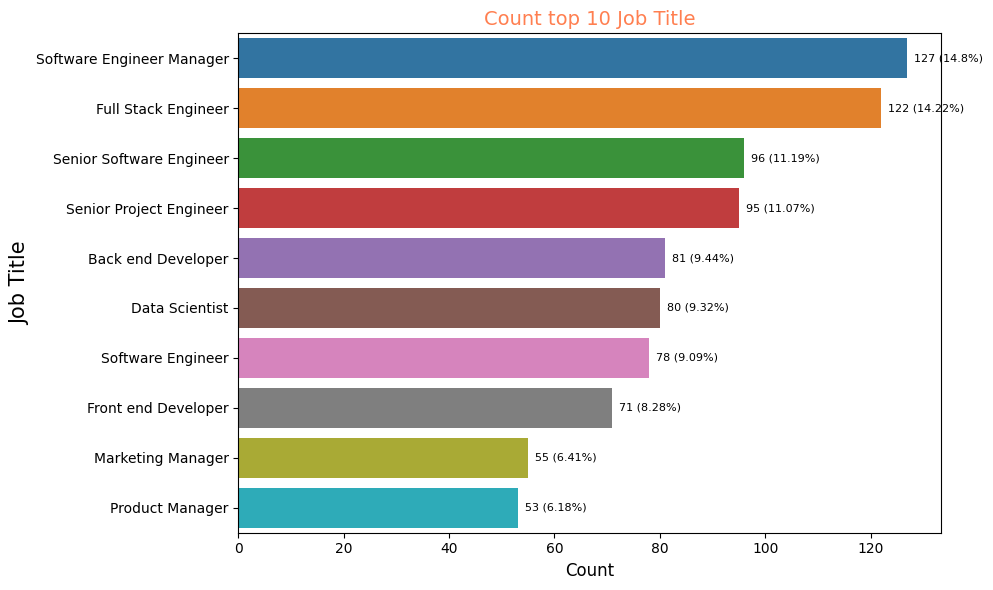

In [28]:
plt.figure(figsize=(10, 6))
a = DF['Job_Title'].value_counts()[:10].values
b = DF['Job_Title'].value_counts()[:10].index

bar7 = sns.barplot(x=a, y=b)

plt.title('Count top 10 Job Title', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=15)

for n, patch in enumerate(bar7.patches):
    porc = f'{round((patch.get_width()/sum(a))*100, 2)}%'
    bar7.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


###Visualization by Years of Experience

In [29]:
DF['Years_of_Experience'].nunique()

37

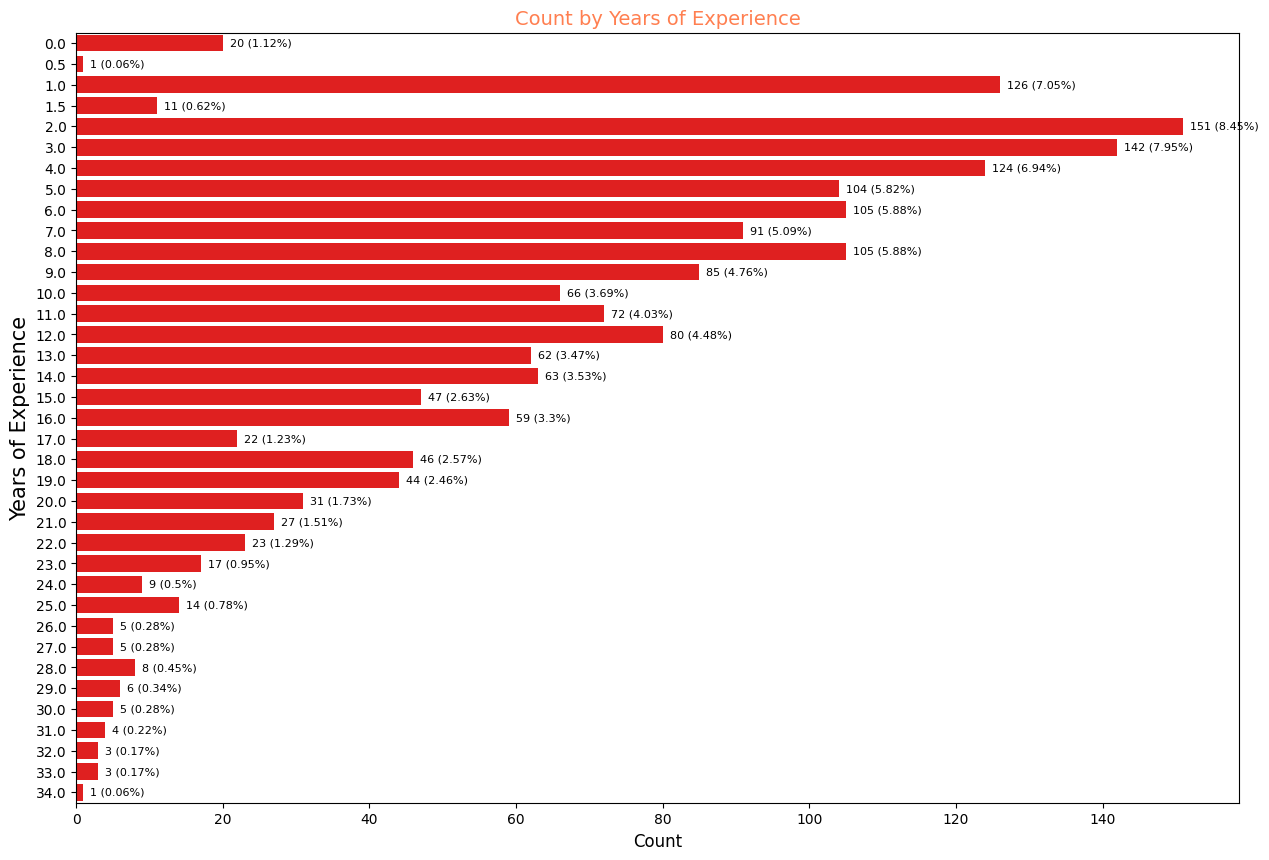

In [30]:
plt.figure(figsize=(15,10))

bar8 = sns.countplot(y=DF['Years_of_Experience'], palette=['red'])
plt.title('Count by Years of Experience', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Years of Experience', fontsize=15)

for n, patch in enumerate(bar8.patches):
    porc = f'{round((patch.get_width()/sum(DF["Years_of_Experience"].value_counts().values))*100, 2)}%'
    bar8.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)

Text(0, 0.5, 'Count')

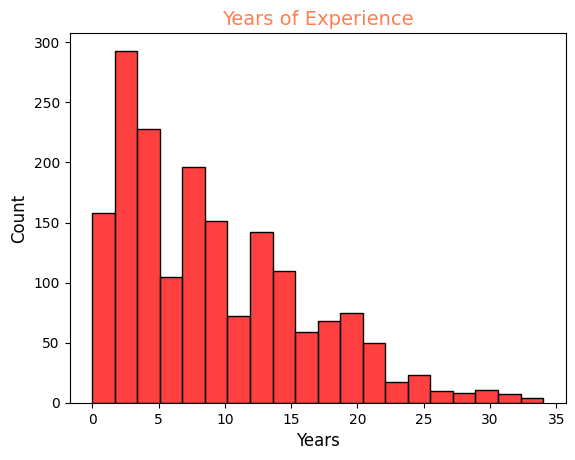

In [31]:
sns.histplot(x=DF['Years_of_Experience'], bins=20, color='red')
plt.title('Years of Experience', color='coral', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=12)

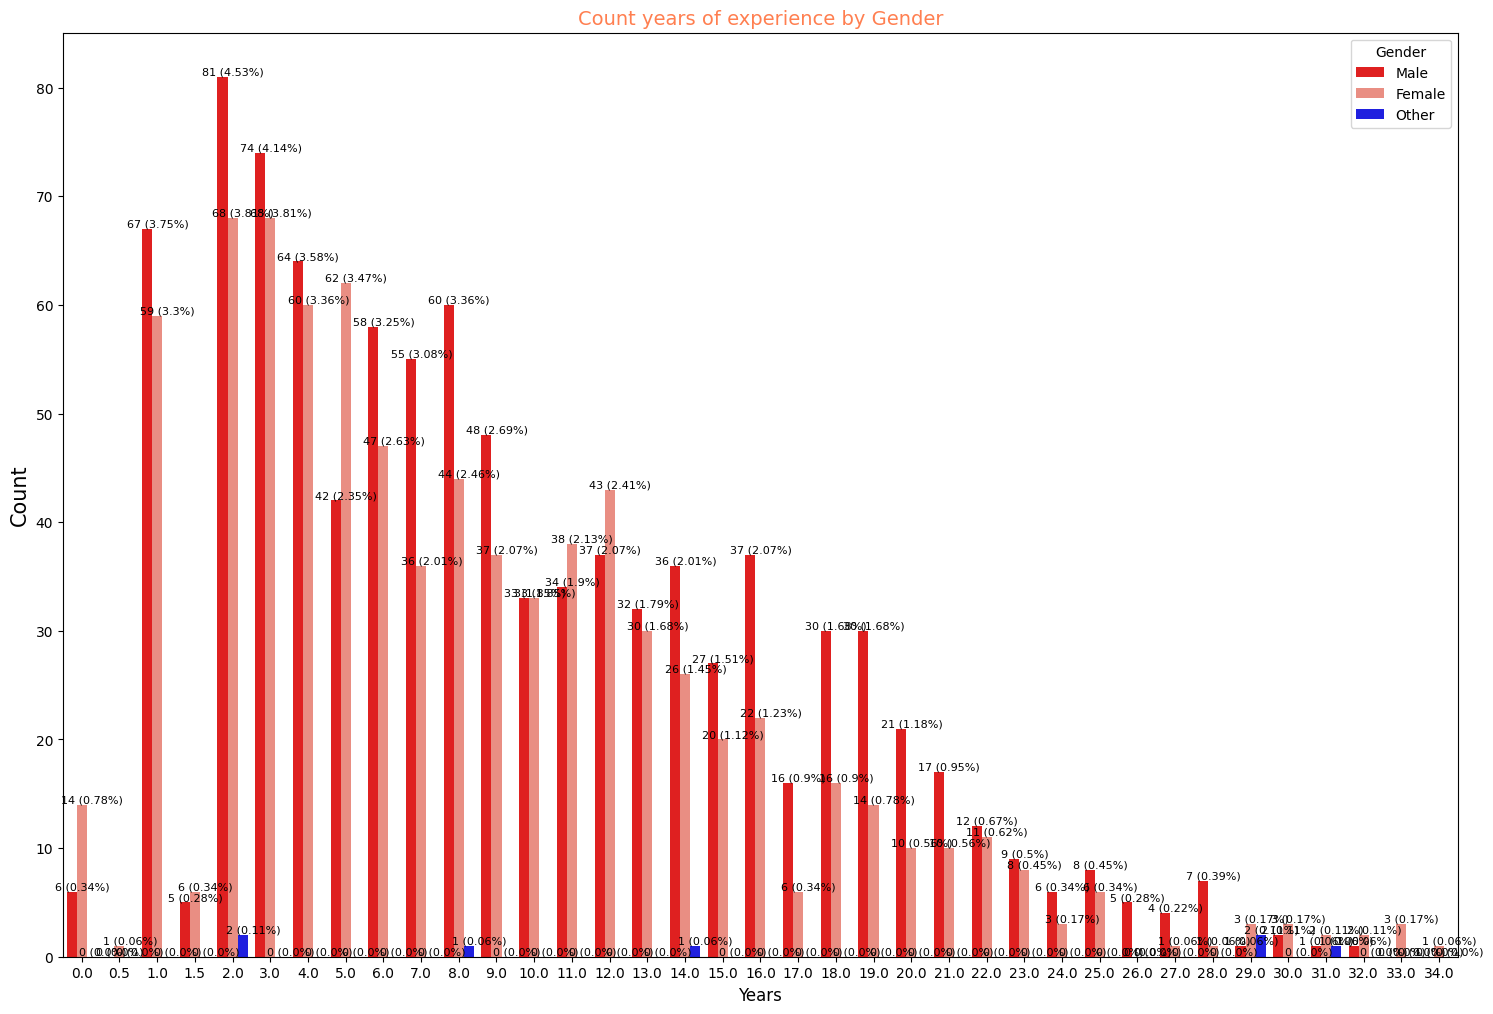

In [32]:
plt.figure(figsize=(18, 12))
bar9= sns.countplot(x=DF['Years_of_Experience'], hue=DF['Gender'], palette=['red', 'salmon', 'blue'])
plt.title('Count years of experience by Gender', color='coral', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=15)

for patch in bar9.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    porc = f'{round((height / sum(DF["Years_of_Experience"].value_counts().values)) * 100, 2)}%'
    bar9.annotate(f'  {int(height)} ({porc})',
                  xy=(x + width / 2, y + height),
                  xytext=(5, 0),
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=8)

plt.show()

###Visualization by Salary

In [33]:
DF['Salary'].nunique()

444

Text(0, 0.5, 'Count')

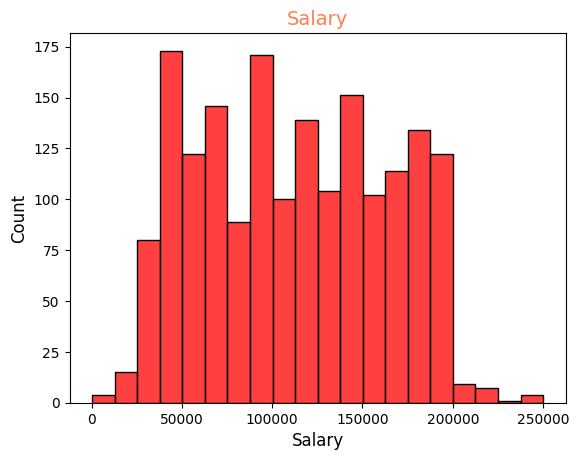

In [34]:
sns.histplot(x=DF['Salary'], bins=20, color='red')
plt.title('Salary', color='coral', fontsize=14)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Count', fontsize=12)

##Data Relation

###Salary and Age

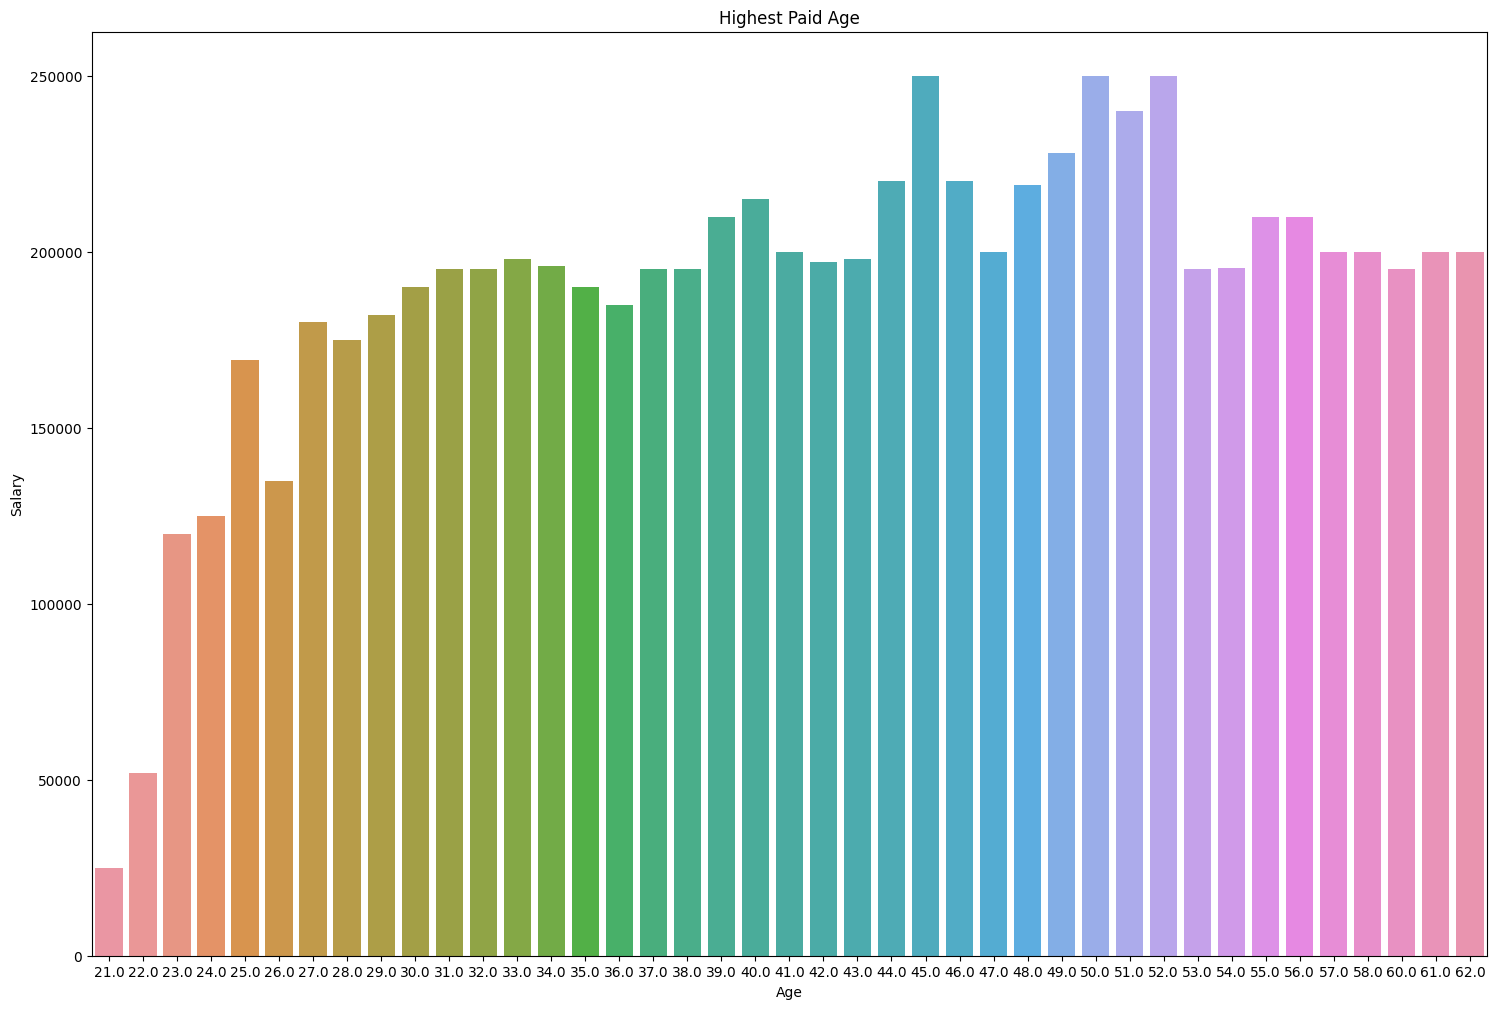

In [86]:
plt.figure(figsize=(18, 12))
Age_salary = DF.groupby('Age')[['Salary']].max().reset_index()
sns.barplot(x = 'Age', y='Salary', data=Age_salary)
plt.title('Highest Paid Age')
plt.show()

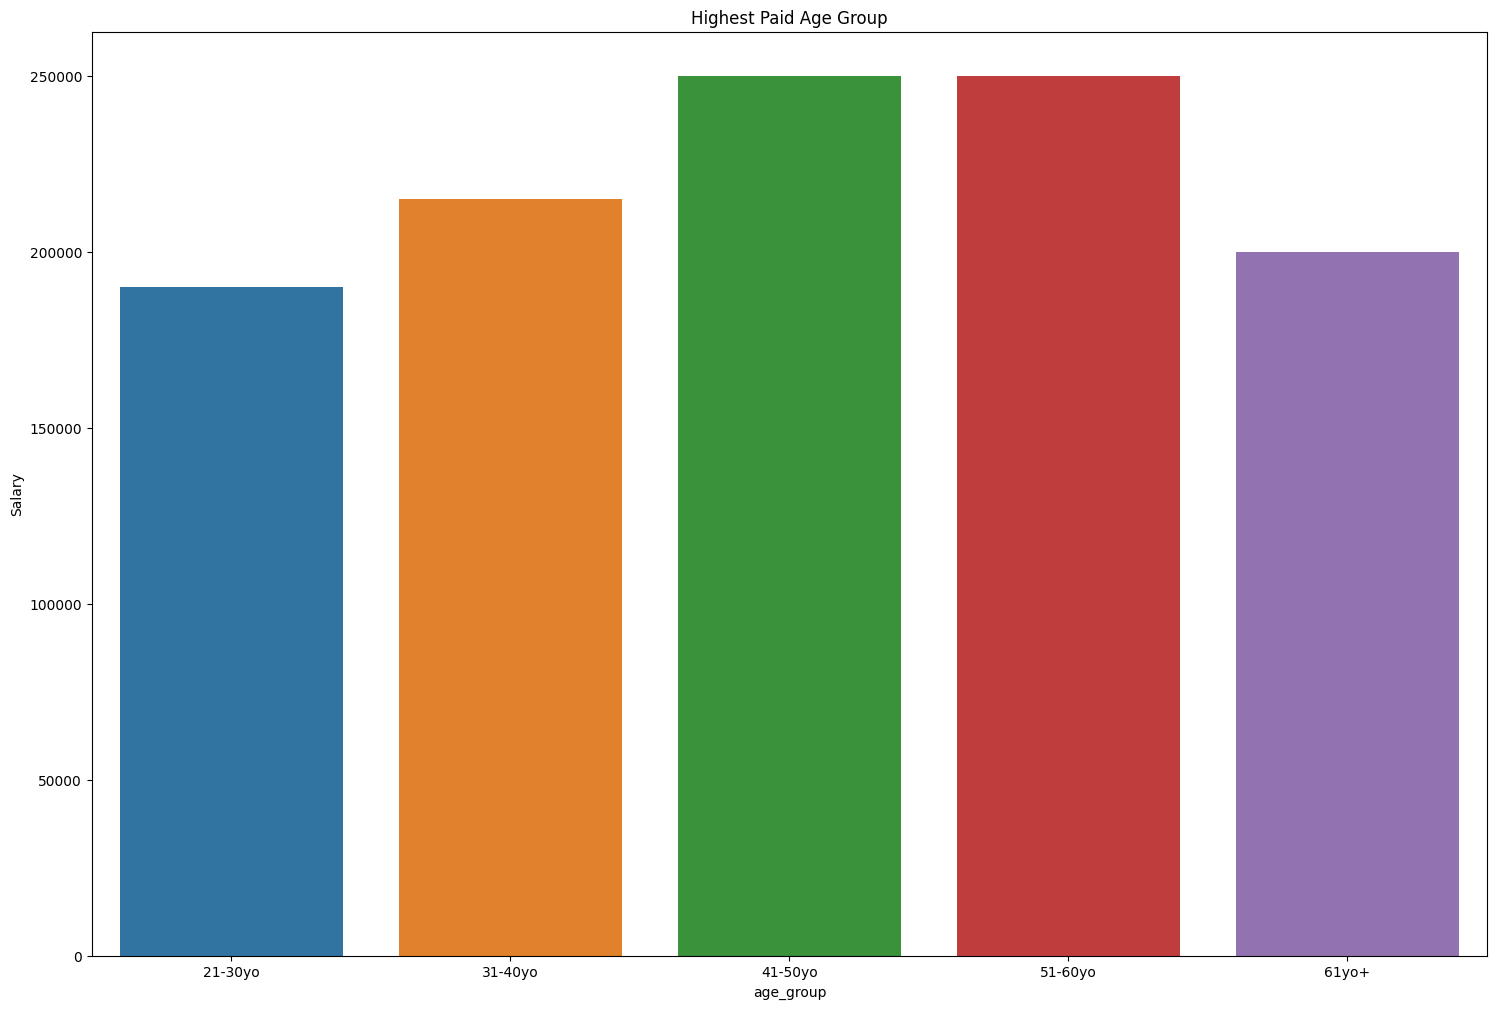

In [89]:
plt.figure(figsize=(18, 12))
Age_group_salary = DF.groupby('age_group')[['Salary']].max().reset_index()
sns.barplot(x = 'age_group', y='Salary', data=Age_group_salary)
plt.title('Highest Paid Age Group')
plt.show()

###Salary and Gender

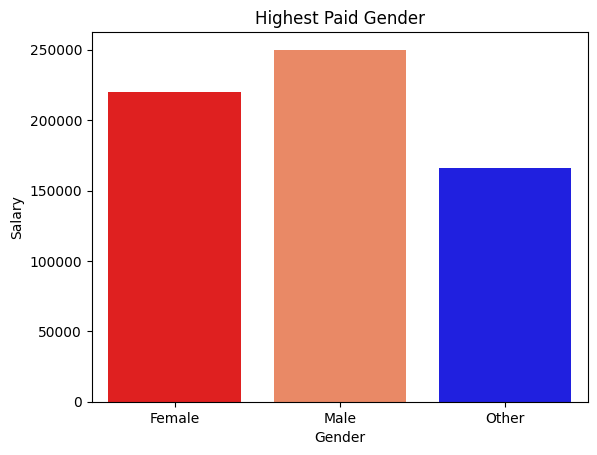

In [62]:
Gender_level_salary = DF.groupby('Gender')[['Salary']].max().reset_index()
sns.barplot(x = 'Gender', y='Salary', data=Gender_level_salary,
            palette=['red', 'coral', 'blue'])
plt.title('Highest Paid Gender')
plt.show()

###Salary and Education Level

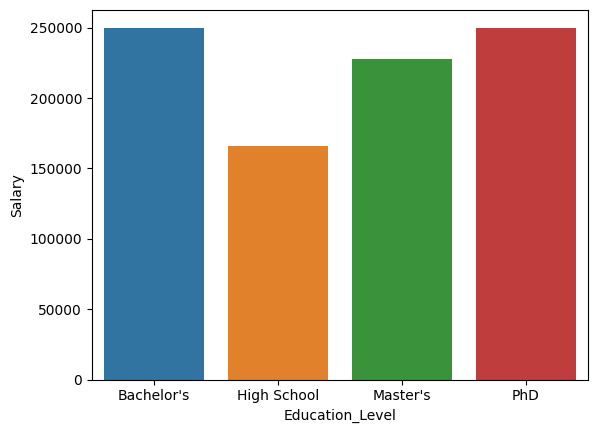

In [37]:
education_level_salary = DF.groupby('Education_Level')[['Salary']].max().reset_index()
sns.barplot(x = 'Education_Level',
            y = 'Salary',
            data = education_level_salary)
plt.show()

<ipython-input-92-7a08b2f729ee>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x=DF['Education_Level'], y=DF['Salary'], hue=DF['Gender'],data=DF, ci=1, palette=['red', 'salmon', 'blue'])


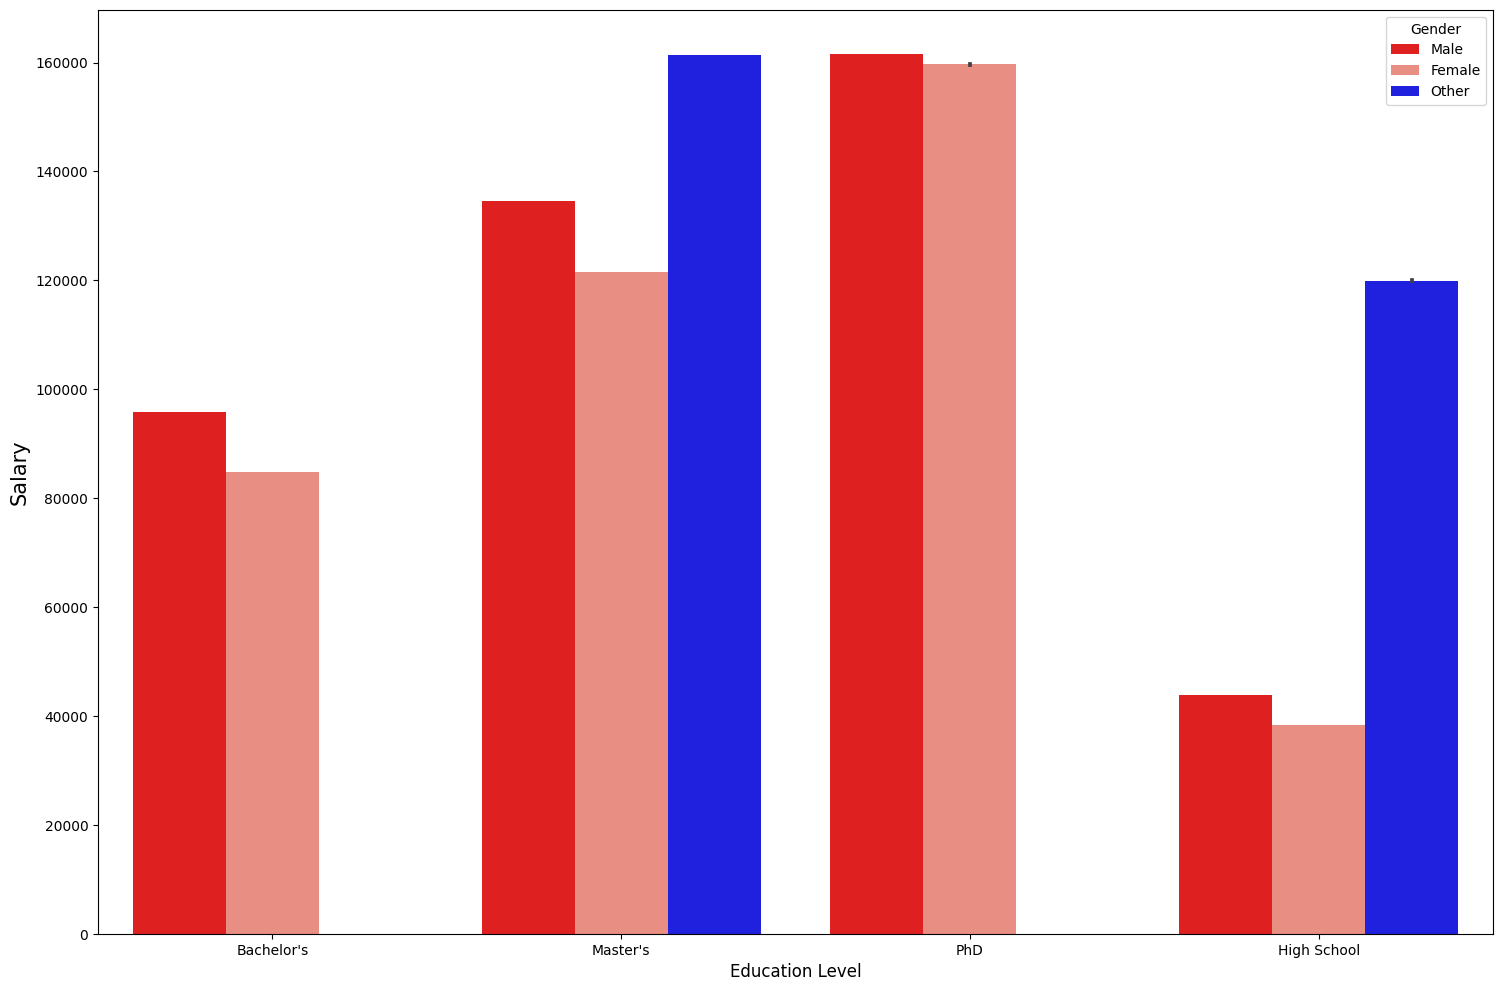

In [92]:
plt.figure(figsize=(18, 12))
sns.barplot(x=DF['Education_Level'], y=DF['Salary'], hue=DF['Gender'],data=DF, ci=1, palette=['red', 'salmon', 'blue'])
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Salary', fontsize=15)

plt.show()

###Salary and Job Title

In [45]:
#top 10 max and min salary Job Title

max_salary_job_title = DF.groupby('Job_Title')[['Salary']].max().reset_index()
min_salary_job_title = DF.groupby('Job_Title')[['Salary']].min().reset_index()

In [46]:
max_salary_job_title = max_salary_job_title.sort_values(by = ['Salary'], ascending=False)
max_salary_job_title = max_salary_job_title.head(10)
min_salary_job_title = min_salary_job_title.sort_values(by = ['Salary'])
min_salary_job_title = min_salary_job_title.head(10)

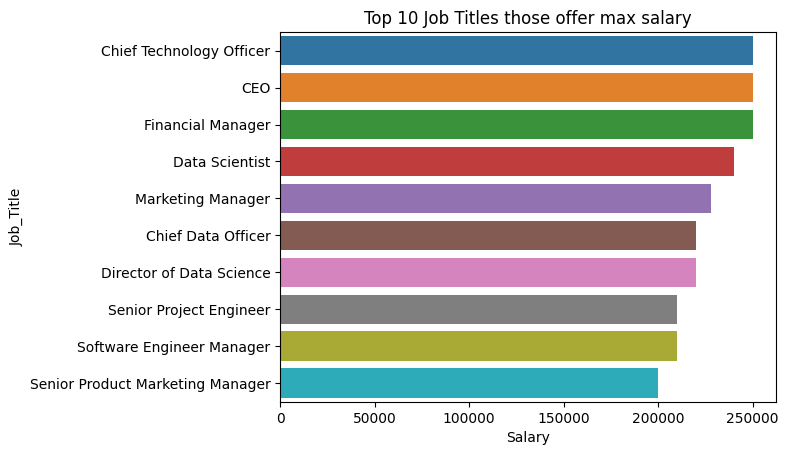

In [68]:
sns.barplot(x = 'Salary', y='Job_Title', data=max_salary_job_title)
plt.title('Top 10 Job Titles those offer max salary')
plt.show()

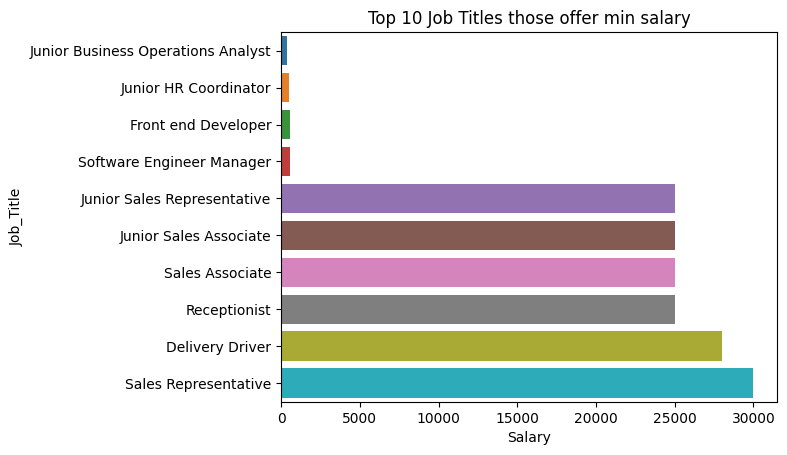

In [66]:
sns.barplot(x = 'Salary', y='Job_Title', data=min_salary_job_title)
plt.title('Top 10 Job Titles those offer min salary')
plt.show()

In [91]:
DF.head(5)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,age_group
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,31-40yo
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,21-30yo
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,41-50yo
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,31-40yo
4,52.0,Male,Master's,Director,20.0,200000.0,51-60yo


###Salary and Years of Expeperience (YOE)

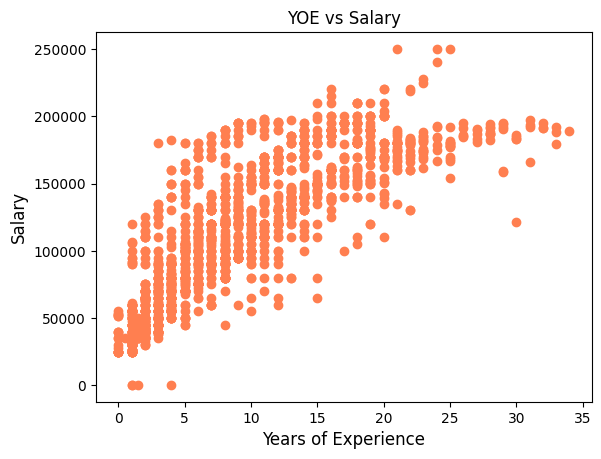

In [35]:
plt.scatter(x = 'Years_of_Experience', y='Salary', data=DF, color='coral')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.title('YOE vs Salary')
plt.show()

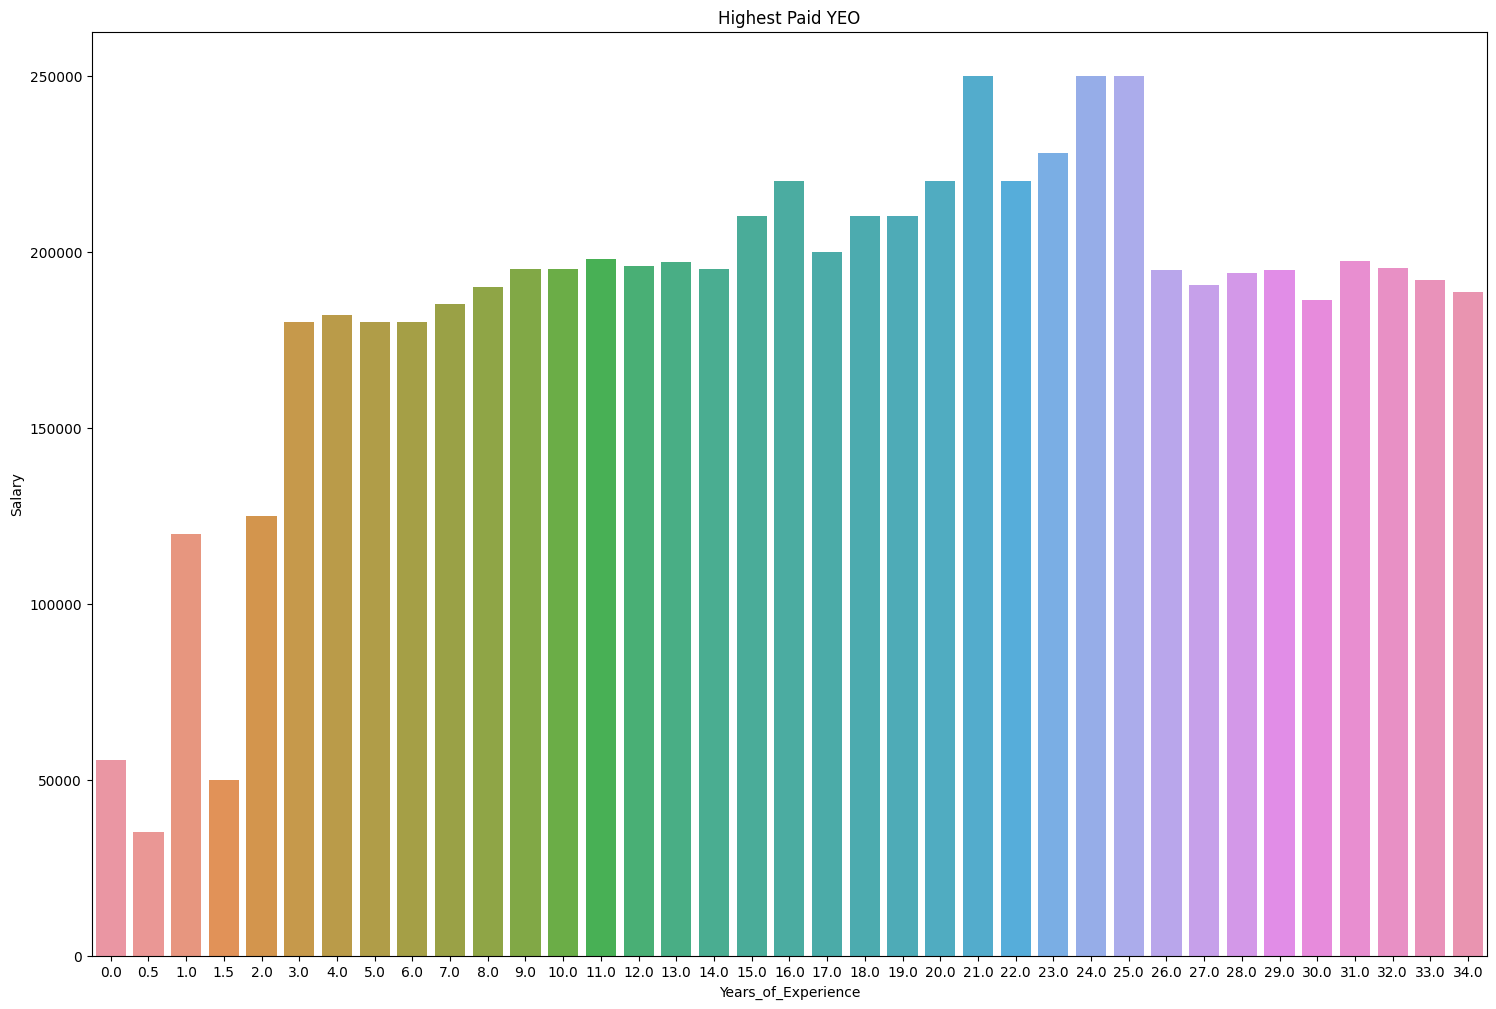

In [90]:
plt.figure(figsize=(18, 12))
YEO_salary = DF.groupby('Years_of_Experience')[['Salary']].max().reset_index()
sns.barplot(x = 'Years_of_Experience', y='Salary', data=YEO_salary)
plt.title('Highest Paid YEO')
plt.show()

<ipython-input-36-6f87e7e00af2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x=DF['Years_of_Experience'], y=DF['Salary'], hue=DF['Gender'],data=DF, ci=1, palette=['red', 'salmon', 'blue'])


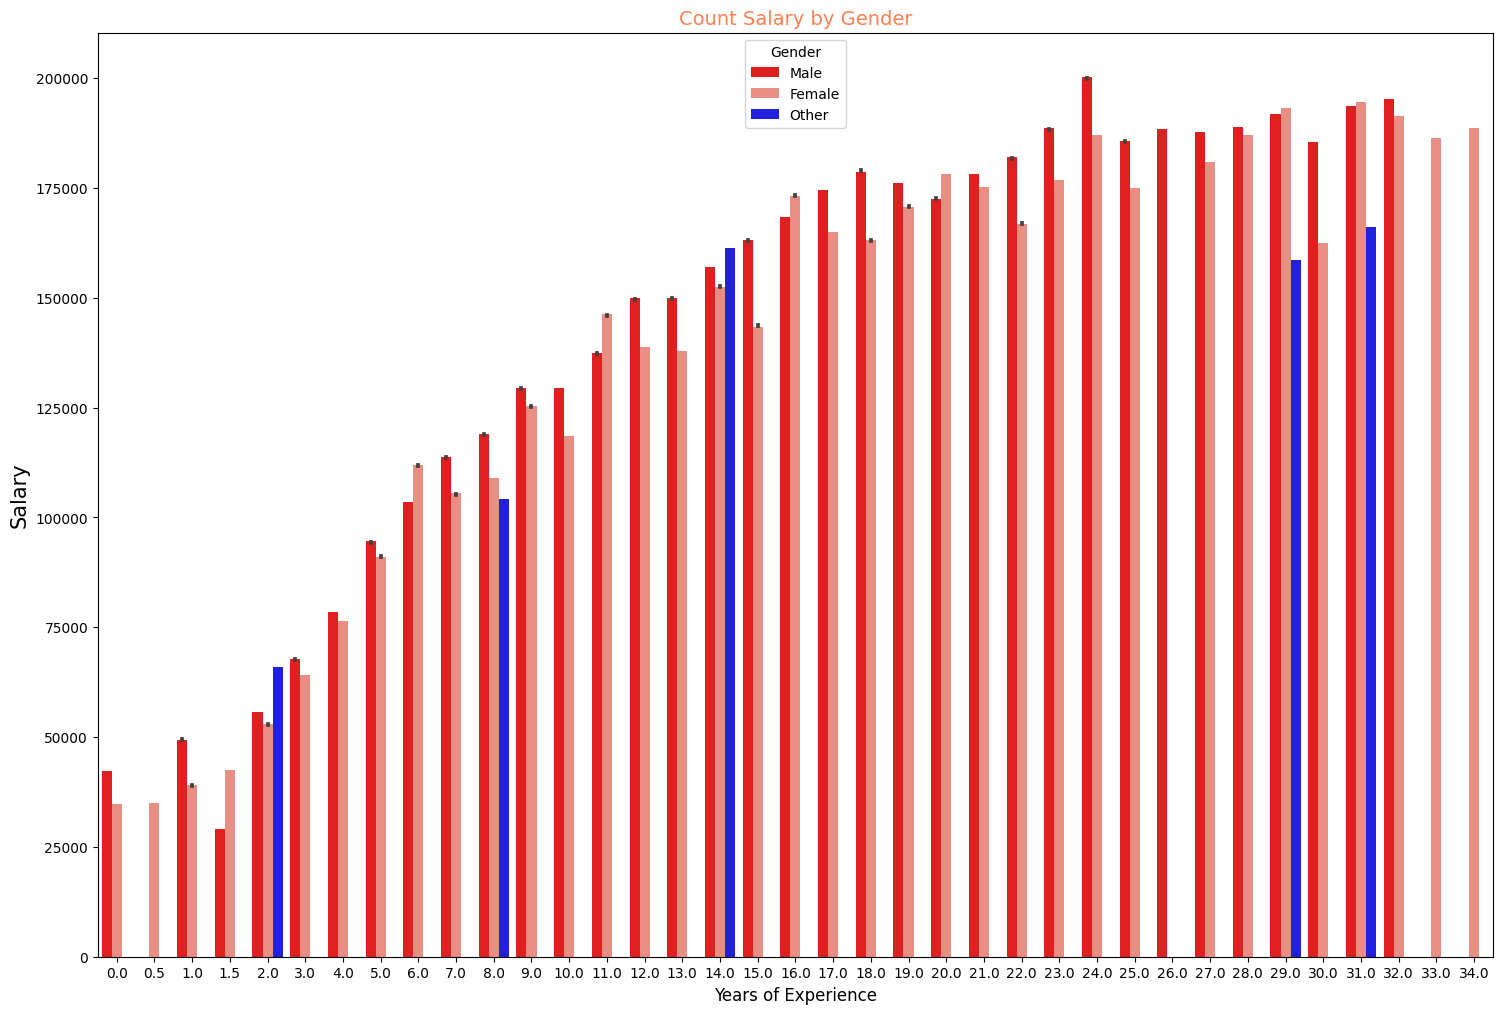

In [36]:
plt.figure(figsize=(18, 12))
sns.barplot(x=DF['Years_of_Experience'], y=DF['Salary'], hue=DF['Gender'],data=DF, ci=1, palette=['red', 'salmon', 'blue'])
plt.title('Count Salary by Gender', color='coral', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=15)


plt.show()

##DATA CORRELATION

In [95]:
## first convert Gender and Education Level to int
DF['Gender'] = DF['Gender'].replace({'Male': 0,'Female':1, 'Other':3})
DF['Education_Level'] = DF['Education_Level'].replace({"High School" : 0,
                                                           "Bachelor's" : 1,
                                                           "Master's" : 2,
                                                           "PhD" : 3})
DF.head(5)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,age_group
0,32.0,0,1,Software Engineer,5.0,90000.0,31-40yo
1,28.0,1,2,Data Analyst,3.0,65000.0,21-30yo
2,45.0,0,3,Senior Manager,15.0,150000.0,41-50yo
3,36.0,1,1,Sales Associate,7.0,60000.0,31-40yo
4,52.0,0,2,Director,20.0,200000.0,51-60yo


<ipython-input-96-9a4b56471b9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr(), annot=True, cmap='BrBG')


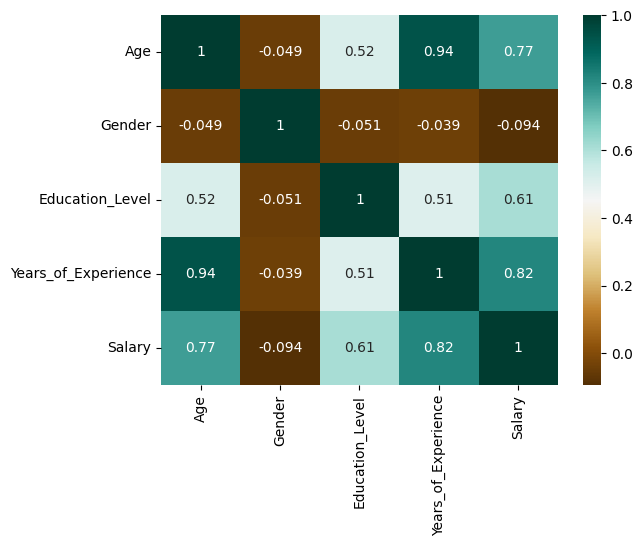

In [96]:
sns.heatmap(DF.corr(), annot=True, cmap='BrBG')
plt.show()

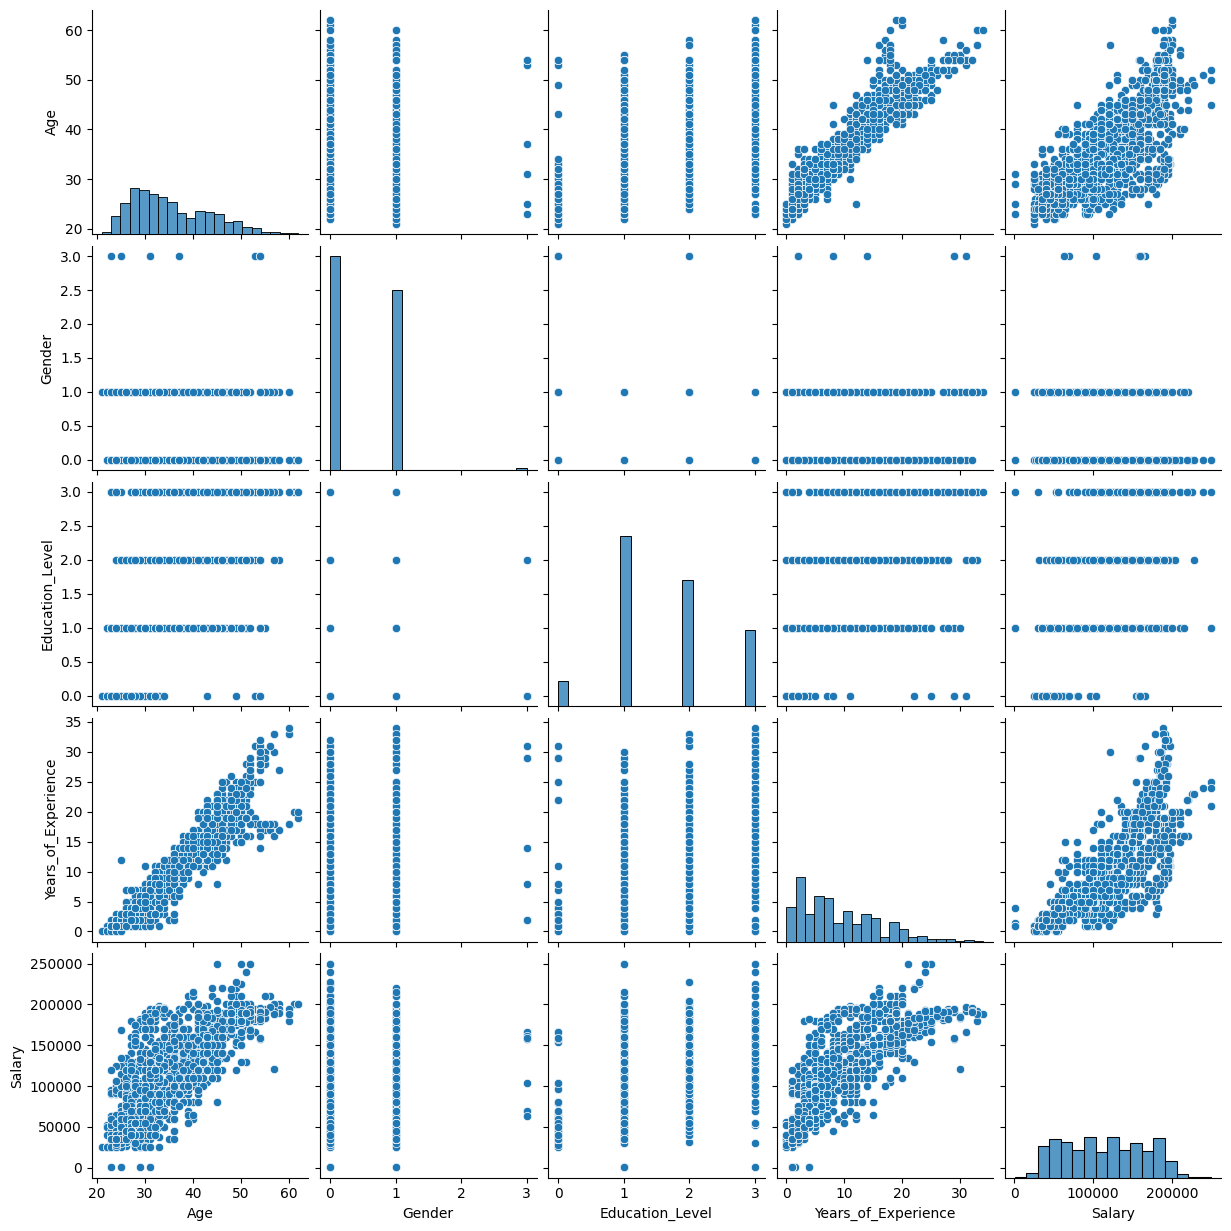

In [97]:
sns.pairplot(DF)